# Определение перспективного тарифа для телеком компании

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Открытие-данных-и-изучение-общей-информации" data-toc-modified-id="Открытие-данных-и-изучение-общей-информации-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Открытие данных и изучение общей информации</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Подготовка-данных-" data-toc-modified-id="Подготовка-данных--3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка данных <a id="preparation"></a></a></span><ul class="toc-item"><li><span><a href="#Предварительная-обработка-" data-toc-modified-id="Предварительная-обработка--3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Предварительная обработка <a id="preprocessing"></a></a></span><ul class="toc-item"><li><span><a href="#users" data-toc-modified-id="users-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>users</a></span></li><li><span><a href="#calls" data-toc-modified-id="calls-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>calls</a></span></li><li><span><a href="#internet" data-toc-modified-id="internet-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>internet</a></span></li><li><span><a href="#messages" data-toc-modified-id="messages-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>messages</a></span></li></ul></li><li><span><a href="#Вычисление-помесячного-использования-" data-toc-modified-id="Вычисление-помесячного-использования--3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Вычисление помесячного использования <a id="permonth"></a></a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#calls" data-toc-modified-id="calls-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>calls</a></span></li><li><span><a href="#messages" data-toc-modified-id="messages-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>messages</a></span></li><li><span><a href="#internet" data-toc-modified-id="internet-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>internet</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Описание проекта 

В настоящем проекте будет проведена аналитика данных, представленных федеральным оператором сотовой связи. Клиентам компания предлагает два тарифных плана: «Смарт» и «Ультра». Нам необходимо понять, какой тариф приносит больше денег, чтобы скорректировать рекламный бюджет.
Предстоит провести предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей оператора: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Проект имеет целью проанализировать поведение клиентов и получить вывод о том, какой тариф лучше.

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

## Открытие данных и изучение общей информации 

In [2]:
try:
    calls = pd.read_csv('calls.csv')
    internet = pd.read_csv('internet.csv')
    messages = pd.read_csv('messages.csv')
    tariffs = pd.read_csv('tariffs.csv')
    users = pd.read_csv('users.csv')
except:
    calls = pd.read_csv('/datasets/calls.csv')
    internet = pd.read_csv('/datasets/internet.csv')
    messages = pd.read_csv('/datasets/messages.csv')
    tariffs = pd.read_csv('/datasets/tariffs.csv')
    users = pd.read_csv('/datasets/users.csv')

Начнем с информации о тарифах:

In [3]:
len(users)

500

In [4]:
tariffs.head(5)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Далее посмотрим на таблицу с пользователями.

In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
users.head(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Единственные пропуски видим в столбце churn_date, означающем дату отключения клиента от тарифа. Также дата представлена в формате object, и его следует заменить на соответствующий дате тип.

Перейдем к таблицам с данными о звонках, интернете и сообщениях, которые были использованы клиентами из таблицы выше.

In [7]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [8]:
len(calls['user_id'].unique())

492

In [9]:
calls.head(5)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


В таблице calls приведены данные о звонках. Пропусков в значениях самой таблицы нет, однако мы видим, что некоторые звонки имеют длительность 0,0 мин. Также уникальных клиентов в таблице представлено всего 492 из 500, что значит, что 8 человек не использовали функцию звонков. Дата имеет неверный формат.

In [10]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [11]:
len(internet['user_id'].unique())

497

In [12]:
internet.head(5)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Следующая таблица с данными об интернете. Пропусков также нет, однако уникальных клиентов 497 из 500 (3 не пользовались интернетом). Формат даты нужно будет изменить.

In [13]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [14]:
len(messages['user_id'].unique())

426

In [15]:
messages.head(5)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Далее — данные о сообщениях. Без пропусков, уникальных клиентов 426 из 500 (74 человека не отправляли сообщения). Формат даты нужно поменять.

#### Вывод

Мы посмотрели на таблицы, которые оказались в нашем распоряжении. Оказалось, что значения пропущены лишь в столбце churn_date из таблицы users, в котором указывается дата расторжения договора с оператором. Также мы выявили, что некоторые клиенты не пользовались определенными услугами. В большем количестве случаев невостребованной оказались сообщения. Помимо прочего, в таблицах используется формат object для дат, вместо формата datetime, что не слишком удобно для дальнейшего анализа.

## Подготовка данных <a id="preparation"></a>
[к оглавлению](#contents)

Ранее мы рассмотрели имеющиеся у нас таблицы, а теперь попробуем исправить найденные в них ошибки. В частности нам необходимо изменить форматы дат и решить, нужно ли восстанавливать пропущенные значения.

### Предварительная обработка <a id="preprocessing"></a>

#### users

В таблице users необходимо заменить тип данных в двух столбцах: reg_date и churn_date.

In [16]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

In [17]:
users['reg_date'].describe()

count                     500
unique                    270
top       2018-05-28 00:00:00
freq                        8
first     2018-01-01 00:00:00
last      2018-12-31 00:00:00
Name: reg_date, dtype: object

Видим, что данные представлены за период с января до декабрь 2018 года.

In [18]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

In [19]:
users['churn_date'].describe()

count                      38
unique                     33
top       2018-10-03 00:00:00
freq                        2
first     2018-08-17 00:00:00
last      2018-12-30 00:00:00
Name: churn_date, dtype: object

Клиенты уходили с августа по декабрь. Также мы обнаружили пропуски в столбце churn_date. Вероятнее всего, они обозначают, что клиент не прекращал обслуживание у оператора. Было решено их оставить в таком же виде, поскольку это не препятствует анализу. Можно лишь посмотреть, с какого тарифа уходили чаще всего.

In [20]:
for tariff in ['ultra', 'smart']:
    print(tariff, 
         (len(users[(users['churn_date'].notnull()) & (users['tariff'] == tariff)]) / len(users['tariff'] == tariff)) * 100)

ultra 3.0
smart 4.6


Получается, с тарифа smart уходили чуть чаще, чем с ultra.

#### calls

В таблице со звонками также меняем тип данных в столбце с датой.

In [21]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

Кроме того, мы обнаружили, что длительность некоторых звонков равняется 0,0 мин. Как вариант это могут быть быстро сброшенные звонки, но в идеале это нужно было бы уточнить у разработчиков. Посмотрим, насколько сильно эти данные искажают распределение звонков.

In [22]:
print('Распределение со звонками длительностью 0,0')
calls['duration'].describe()

Распределение со звонками длительностью 0,0


count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

In [23]:
print('Распределение без звонков длительностью 0,0')
calls.query('duration > 0.0')['duration'].describe()

Распределение без звонков длительностью 0,0


count    162994.000000
mean          8.397794
std           5.353022
min           0.010000
25%           4.170000
50%           7.740000
75%          11.850000
max          38.000000
Name: duration, dtype: float64

In [24]:
len(calls.query('duration == 0.0')['user_id'].unique())

492

Видим небольшое смещение среднего и медианы (меньше половины стандартного отклонения), однако разница между ними немного сокращается. Раз эти данные не несут никакой информации и не сильно вляют на распределение, можно их удалить.

In [25]:
calls = calls.drop(calls[calls['duration'] == 0].index).reset_index(drop=True)

#### internet

В таблице с данными о потребленном интернете также заменяем тип столбца с датой.

In [26]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

Также можно удалить столбец 'Unnamed: 0', который просто повторяет индекс.

In [27]:
internet = internet.drop('Unnamed: 0', axis=1)

In [28]:
internet['mb_used'].describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

В этой таблице объем потребляемого интернета в некоторых случаях равняется 0. Поступим по аналогии со звонками и посмотрим, насколько сильно эти данные искажают распределение звонков.

In [29]:
len(internet.query('mb_used > 0.0')['user_id'].unique()) #датасет без нулевых значений

497

In [30]:
print('Распределение без расхода интернета 0,0')
internet.query('mb_used > 0.0')['mb_used'].describe()

Распределение без расхода интернета 0,0


count    129798.000000
mean        426.087210
std         255.596447
min           0.030000
25%         227.460000
50%         400.540000
75%         592.947500
max        1724.830000
Name: mb_used, dtype: float64

Распределение меняется не сильно, данные не несут важной информации, можно их удалить.

In [31]:
internet = internet.drop(internet[internet['mb_used'] == 0].index).reset_index(drop=True)

#### messages

Меняем тип столбца с датой.

In [32]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

In [33]:
messages['message_date'].describe()

count                  123036
unique                    364
top       2018-12-31 00:00:00
freq                      859
first     2018-01-02 00:00:00
last      2018-12-31 00:00:00
Name: message_date, dtype: object

### Вычисление помесячного использования <a id="permonth"></a>

Посчитаем количество сделанных звонков и израсходованных минут разговора и гигабайт интернета по месяцам для каждого пользователя. Из этих данных мы в дальнейшем получим выручку по каждому клиенту. Начнем с того, что создадим новый столбец с месяцем, в который звонок был сделан.

In [34]:
calls['calls_month'] = pd.DatetimeIndex(calls['call_date']).month

Далее группируем значения по ИД клиента и по месяцам, посчитав количество сделанных звонков по каждому из них.

In [35]:
calls_count = calls.pivot_table(index=['user_id', 'calls_month'], values='duration', aggfunc='count').reset_index() 
calls_count.head()

,user_id,calls_month,duration
0,1000,5,17
1,1000,6,28
2,1000,7,41
3,1000,8,42
4,1000,9,46


По такому же принципу рассчитаем количество использованных минут. Но предварительно округлим длительность всех звонков до целых минут.

In [36]:
calls['duration'] = calls['duration'].apply(lambda x: math.ceil(x))

In [37]:
calls_sum = calls.pivot_table(index=['user_id', 'calls_month'], values='duration', aggfunc='sum').reset_index() 
calls_sum['duration'].describe()

count    3168.000000
mean      457.797033
std       237.423514
min         1.000000
25%       290.750000
50%       447.500000
75%       592.250000
max      1673.000000
Name: duration, dtype: float64

Далее считаем количество отправленных сообщений по месяцам. Первоначально создаем столбец с месяцем, а затем делаем сводную таблицу.

In [38]:
messages['messages_month'] = pd.DatetimeIndex(messages['message_date']).month

In [39]:
messages_count = messages.pivot_table(index=['user_id', 'messages_month'], 
                                                                values='message_date', aggfunc='count').reset_index() 
messages_count.columns = ['user_id', 'messages_month', 'messages_count']
messages_count['messages_count'].describe()

count    2717.000000
mean       45.283769
std        35.051363
min         1.000000
25%        19.000000
50%        38.000000
75%        63.000000
max       224.000000
Name: messages_count, dtype: float64

Аналогично считаем объем израсходованного интернет-трафика по месяцам в гигабайтах.

In [40]:
internet['internet_month'] = pd.DatetimeIndex(internet['session_date']).month

In [41]:
internet_used = internet.pivot_table(index=['user_id', 'internet_month'], 
                                                                values='mb_used', aggfunc='sum').reset_index()
internet_used['gb_used'] = internet_used['mb_used'].apply(lambda x: math.ceil(x/1024)) # пересчитаем в ГБ
internet_used['gb_used'].describe()

count    3201.000000
mean       17.369260
std         7.332836
min         1.000000
25%        13.000000
50%        17.000000
75%        21.000000
max        49.000000
Name: gb_used, dtype: float64

Теперь рассчитаем помесячную выручку с каждого пользователя.

In [42]:
tariffs['gb_per_month'] = tariffs['mb_per_month_included'] / 1024 # заменим мб на гб
tariffs = tariffs.drop('mb_per_month_included', axis=1).T # перевернем для дальнейшего использования
tariffs.columns = ['smart', 'ultra']
tariffs

,smart,ultra
messages_included,50,1000
minutes_included,500,3000
rub_monthly_fee,550,1950
rub_per_gb,200,150
rub_per_message,3,1
rub_per_minute,3,1
tariff_name,smart,ultra
gb_per_month,15,30


Объединим данные по звонкам, сообщениям и интернету, полученные выше, в одну таблицу.

In [43]:
users_merged = calls_sum.merge(messages_count, how='outer', left_on=['user_id', 'calls_month'], 
                                                        right_on=['user_id', 'messages_month']).drop('messages_month', axis=1)
users_merged = users_merged.merge(internet_used, how='outer', left_on=['user_id', 'calls_month'], 
                                                        right_on=['user_id', 'internet_month']).drop('internet_month', axis=1)
users_merged.head(5)

,user_id,calls_month,duration,messages_count,mb_used,gb_used
0,1000,5.0,159.0,22.0,2253.49,3.0
1,1000,6.0,172.0,60.0,23233.77,23.0
2,1000,7.0,340.0,75.0,14003.64,14.0
3,1000,8.0,408.0,81.0,14055.93,14.0
4,1000,9.0,466.0,57.0,14568.91,15.0


In [44]:
messages['messages_month'].count(), messages_count['messages_count'].sum(), users_merged['messages_count'].sum()

(123036, 123036, 123036.0)

Далее для каждого клиента укажем используемый им тариф и город проживания. Это нам понадобится для дальнейших расчетов.

In [45]:
users = users.set_index('user_id') # для удобства пользования заменим индекс в таблице users на ИД клиентов
users_merged['tariff'] = users_merged['user_id'].apply(lambda x: users.loc[x, 'tariff'])
users_merged['city'] = users_merged['user_id'].apply(lambda x: users.loc[x, 'city'])
users_merged = users_merged.fillna(0)

In [46]:
users_merged.head()

,user_id,calls_month,duration,messages_count,mb_used,gb_used,tariff,city
0,1000,5.0,159.0,22.0,2253.49,3.0,ultra,Краснодар
1,1000,6.0,172.0,60.0,23233.77,23.0,ultra,Краснодар
2,1000,7.0,340.0,75.0,14003.64,14.0,ultra,Краснодар
3,1000,8.0,408.0,81.0,14055.93,14.0,ultra,Краснодар
4,1000,9.0,466.0,57.0,14568.91,15.0,ultra,Краснодар


Далее высчитаем непосредственно выручку. Вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана, прибавим абонентскую плату, соответствующую тарифному плану.

In [47]:
def count_revenue(row, tariffs):
    tariff = row['tariff']
    revenue = tariffs.loc['rub_monthly_fee', tariff]
    calls = max(row['duration'] - tariffs.loc['minutes_included', tariff], 0) * tariffs.loc['rub_per_minute', tariff]
    messages = (max(row['messages_count'] - tariffs.loc['messages_included', tariff], 0)*
                                                                                         tariffs.loc['rub_per_message', tariff])
    internet = (max(row['gb_used'] - tariffs.loc['gb_per_month', tariff], 0) * tariffs.loc['rub_per_gb', tariff])
    return revenue + calls + messages + internet

In [48]:
users_merged['revenue_per_month'] = users_merged.apply(count_revenue, tariffs=tariffs, axis=1)

In [49]:
users_merged['revenue_per_month'].describe()

count    3258.000000
mean     1531.323204
std       795.552898
min       550.000000
25%       750.000000
50%      1677.000000
75%      1950.000000
max      6770.000000
Name: revenue_per_month, dtype: float64

**Вывод**

В данном шаге мы выполнили предобработку данных. Среди прочего мы заменили тип столбцов, содержащих даты, на datetime, удалили звонки длительностью 0,0 минут и интернет-сессии с потреблением трафика, равному 0. Также мы заметили, что с тарифа смарт клиенты уходили чаще, чем с тарифа ультра. 

После проведенной подготовки мы сгруппировали потребленные услуги по каждому клиенту и по месяцам, и уже исходя из полученных данных рассчитали помесячный доход на каждого.


## Анализ данных 

Посмотрим на поведение клиентов оператора, представленных в выборке. Посчитаем, сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц в среднем.

In [50]:
print('Среднее кол-во минут: {:.2f}, сообщений: {:.2f}, гигабайт: {:.2f}'.format(users_merged['duration'].mean(), 
                                                                     users_merged['messages_count'].mean(), 
                                                                     users_merged['gb_used'].mean()))

Среднее кол-во минут: 445.15, сообщений: 37.76, гигабайт: 17.07


Как видим, в среднем в месяц клиенты тратят 445,15 минут на телефонные звонки, отправляют 37 сообщений, используют 17,07 ГБ интернета. Средняя выручка на клиента составляет 1531 рубль.

Теперь у нас есть объединенная таблица с основными данными о клиентах и помесячным расчетом потребляемых услуг, а также ежемесячной платы по каждому. Для дальнейшего анализа разделим датасет на два набора данных — клиенты с тарифом ультра и с тарифом смарт.

In [51]:
users_ultra = users_merged[users_merged['tariff'] == 'ultra']
users_smart = users_merged[users_merged['tariff'] == 'smart']

print('Общая выручка ultra: {:.2f}, количество клиентов: {}'.format(users_ultra['revenue_per_month'].sum(), 
                                                                    len(users_ultra['user_id'].unique())))
print('Общая выручка smart: {:.2f}, количество клиентов: {}'.format(users_smart['revenue_per_month'].sum(), 
                                                                    len(users_smart['user_id'].unique())))

Общая выручка ultra: 2109300.00, количество клиентов: 148
Общая выручка smart: 2879751.00, количество клиентов: 350


### calls

Посмотрим распределение количества минут, сообщений и потраченных гигабайт для клиентов каждого из тарифов и сравним основные показатели. Для этого построим графики и высчитаем дисперсию и стандартное отклонение.

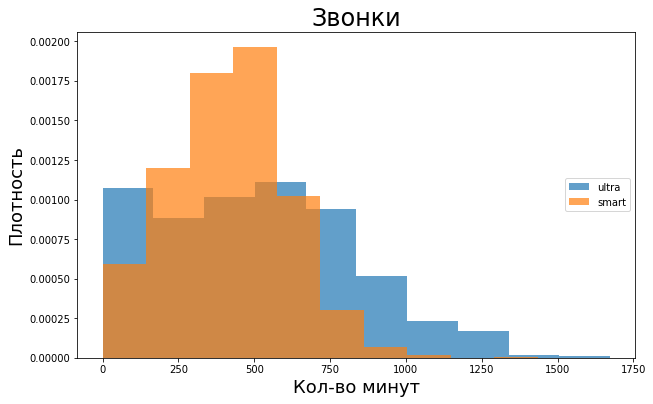

In [52]:
fig, ax = plt.subplots(figsize=(10,6))

ax.hist(users_ultra['duration'], label="ultra", alpha=0.7, density=True)
ax.hist(users_smart['duration'], label='smart', alpha=0.7, density=True)
ax.set_xlabel('Кол-во минут', fontsize=18)
ax.set_ylabel('Плотность', fontsize=18)
ax.set_title('Звонки', fontsize=24)
ax.legend(loc=5);

In [53]:
ultra_var_cal = np.var(users_ultra['duration'], ddof=1)
ultra_std_cal = np.sqrt(ultra_var_cal)

smart_var_cal = np.var(users_smart['duration'], ddof=1)
smart_std_cal = np.sqrt(smart_var_cal)

print('Дисперсия для тарифа ультра {:.2f}, среднее — {:.2f}, стандартное отклонение — {:.2f}'
      .format(ultra_var_cal, users_ultra['duration'].mean(), ultra_std_cal))
print('Дисперсия для тарифа смарт {:.2f}, среднее — {:.2f}, стандартное отклонение — {:.2f}'
      .format(smart_var_cal, users_smart['duration'].mean(), smart_std_cal))

Дисперсия для тарифа ультра 106756.45, среднее — 508.05, стандартное отклонение — 326.74
Дисперсия для тарифа смарт 36712.43, среднее — 416.44, стандартное отклонение — 191.60


Как видим, распределение звонков для обоих тарифов близко к распределению Пуассона, только для тарифа ультра это распределение более плоское — его дисперсия превышает дисперсию тарифа смарт почти в 3 раза, а стандартное отклонение — в 1,7 раза. В среднем клиенты тарифа ультра используют на 92 минуты больше, чем клиенты тарифа смарт.

### messages

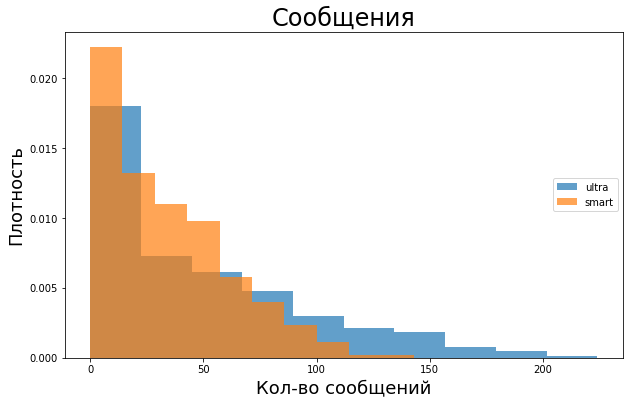

In [54]:
fig, ax = plt.subplots(figsize=(10,6))

ax.hist(users_ultra['messages_count'], label="ultra", alpha=0.7, density=True)
ax.hist(users_smart['messages_count'], label='smart', alpha=0.7, density=True)
ax.set_xlabel('Кол-во сообщений', fontsize=18)
ax.set_ylabel('Плотность', fontsize=18)
ax.set_title('Сообщения', fontsize=24)
ax.legend(loc=5);

In [55]:
ultra_var_mes = np.var(users_ultra['messages_count'], ddof=1)
ultra_std_mes = np.sqrt(ultra_var_mes)

smart_var_mes = np.var(users_smart['messages_count'], ddof=1)
smart_std_mes = np.sqrt(smart_var_mes)

print('Дисперсия для тарифа ультра {:.2f}, среднее — {:.2f}, стандартное отклонение — {:.2f}'
      .format(ultra_var_mes, users_ultra['messages_count'].mean(), ultra_std_mes))
print('Дисперсия для тарифа смарт {:.2f}, среднее — {:.2f}, стандартное отклонение — {:.2f}'
      .format(smart_var_mes, users_smart['messages_count'].mean(), smart_std_mes))

Дисперсия для тарифа ультра 2287.58, среднее — 47.62, стандартное отклонение — 47.83
Дисперсия для тарифа смарт 797.94, среднее — 33.26, стандартное отклонение — 28.25


На графиках распределение звонков для обоих тарифов напоминает геометрическое. Данные скошенны вправо. У тарифа ультра "хвост" длиннее, и дисперсия превышает дисперсию тарифа смарт почти в 3 раза. Стандартное отклонение тарифа ультра больше в 1,7 раза. В среднем клиенты тарифа ультра отправляют на 14 сообщений больше, чем клиенты тарифа смарт.

### internet

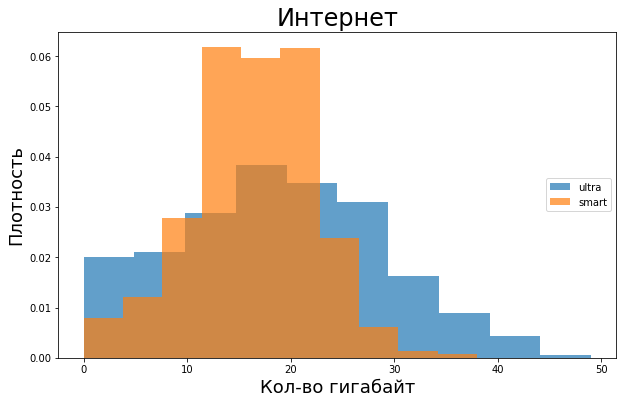

In [56]:
fig, ax = plt.subplots(figsize=(10,6))

ax.hist(users_ultra['gb_used'], label="ultra", alpha=0.7, density=True)
ax.hist(users_smart['gb_used'], label='smart', alpha=0.7, density=True)
ax.set_xlabel('Кол-во гигабайт', fontsize=18)
ax.set_ylabel('Плотность', fontsize=18)
ax.set_title('Интернет', fontsize=24)
ax.legend(loc=5);

In [57]:
ultra_var_int = np.var(users_ultra['gb_used'], ddof=1)
ultra_std_int = np.sqrt(ultra_var_int)

smart_var_int = np.var(users_smart['gb_used'], ddof=1)
smart_std_int = np.sqrt(smart_var_int)

print('Дисперсия для тарифа ультра {:.2f}, среднее — {:.2f}, стандартное отклонение — {:.2f}'
      .format(ultra_var_int, users_ultra['gb_used'].mean(), ultra_std_int))
print('Дисперсия для тарифа смарт {:.2f}, среднее — {:.2f}, стандартное отклонение — {:.2f}'
      .format(smart_var_int, users_smart['gb_used'].mean(), smart_std_int))

Дисперсия для тарифа ультра 106.60, среднее — 18.81, стандартное отклонение — 10.32
Дисперсия для тарифа смарт 33.86, среднее — 16.27, стандартное отклонение — 5.82


Распределение потребленного интернета для улиентов смарта тарифов близко к распределению Лапласа, а у тарифа ультра к Пуассону. Дисперсия тарифа ультра превышает дисперсию тарифа смарт в 3 раза, стандартное отклонение — в 1,8 раза, но в среднем клиенты тарифа ультра отправляют используют лишь на 2,54 ГБ больше, чем клиенты тарифа смарт.

**Вывод**

Мы провели анализ имеющихся данных и сравнили поведение клиентов двух разных тарифов. Оказалось, что в среднем клиенты тарифа ультра тратят больше минут, отправляют больше сообщений и используют больше интернета. Если сравнивать среднее кол-во потребленных услуг для каждого тарифа со средним по всей выборке, то потребление клиентов ультра всегда выше среднего, а смарт — ниже. При этом общая выручка по тарифу смарт больше в 1,4 раза за счет большего количества клиентов (в 2,4 раза).

## Проверка гипотез 

Посмотрим на среднюю выручку каждого из тарифов.

In [58]:
print('Средняя выручка тарифа ультра: {:.2f}, тарифа смарт {:.2f}'.format(users_ultra['revenue_per_month'].mean(), 
                                                                          users_smart['revenue_per_month'].mean()))

Средняя выручка тарифа ультра: 2065.92, тарифа смарт 1287.33


<div style="border:solid lightblue 2px; padding: 10px">
Проверим, можно ли считать эти средние равными. Проверяемая гипотеза должна формулироваться таким образом, чтобы можно было использовать знак равенства, поэтому в нашем случае нулевая гипотеза будет выглядеть следующим образом: 

**«Средняя выручка пользователей тарифов "Ультра" и "Смарт" равны»**, 

а альтернативная:

**«Средняя выручка пользователей тарифов "Ультра" и "Смарт" не равны»**,

Для проверки нулевой гипотезы проведем t-test и будем использовать общепринятый критерий в 5%. Однако прежде всего проверим распределение данных и проверим, равны ли дисперсии наших выборок.
<div/>

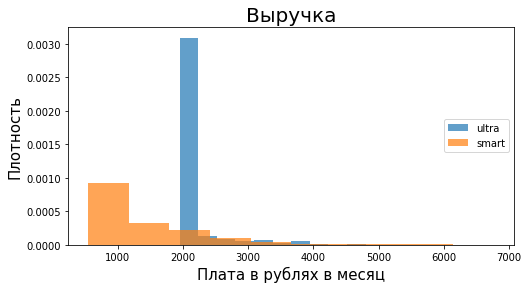

In [59]:
fig, ax = plt.subplots(figsize=(8,4))

ax.hist(users_ultra['revenue_per_month'], label="ultra", alpha=0.7, density=True)
ax.hist(users_smart['revenue_per_month'], label='smart', alpha=0.7, density=True)
ax.set_xlabel('Плата в рублях в месяц', fontsize=15)
ax.set_ylabel('Плотность', fontsize=15)
ax.set_title('Выручка', fontsize=20)
ax.legend(loc=5);

Распределение далеко от нормального, поэтому используем для проверки равенства дисперсий тест Левене. По его результатам определим значение equal_var для t-testa.

In [60]:
levene = st.levene(users_ultra['revenue_per_month'], 
                   users_smart['revenue_per_month'])
alpha = 0.05
print('p-значение для теста Левене:', levene.pvalue)
if levene.pvalue < alpha:
    print('Гипотеза о равенстве дисперсий не нашла подтверждения')
else:
    print('Отвергнуть гипотезу о равенстве дисперсий не удалось')

p-значение для теста Левене: 1.4025375794272886e-127
Гипотеза о равенстве дисперсий не нашла подтверждения


In [61]:
equal_means = st.ttest_ind(
            users_ultra['revenue_per_month'],
            users_smart['revenue_per_month'],
            equal_var = False)

print('p-значение: ', equal_means.pvalue)
if equal_means.pvalue < alpha:
    print('Гипотеза о равенстве средних показателей выручки не нашла подтверждения')
else:
    print('Отвергнуть гипотезу о равенстве средних показателей выручки не удалось')

p-значение:  5.4285168904175035e-255
Гипотеза о равенстве средних показателей выручки не нашла подтверждения


Выходит, что средние выручки по двум тарифам считать равными нельзя.

Далее посмотрим на среднюю выручку по Москве и регионам и проверим, есть ли между ними разница.

<div style="border:solid lightblue 2px; padding: 10px">
Сформулируем нулевую гипотезу следующим образом:

**«Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов»**, 

а альтернативную:

**«Средняя выручка пользователей из Москвы не равна выручке пользователей из других регионов»**.

Проверку проведем по аналогии с предыдущей.
<div/>

In [62]:
users_moscow = users_merged.query('city == "Москва"')
users_regions = users_merged.query('city != "Москва"')

print('Средняя выручка в Москве: {:.2f}, в регионах: {:.2f}'
      .format(users_moscow['revenue_per_month'].mean(), users_regions['revenue_per_month'].mean()))

Средняя выручка в Москве: 1546.71, в регионах: 1527.77


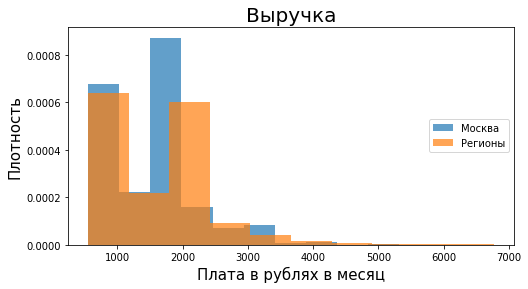

In [63]:
fig, ax = plt.subplots(figsize=(8,4))

ax.hist(users_moscow['revenue_per_month'], label="Москва", alpha=0.7, density=True)
ax.hist(users_regions['revenue_per_month'], label='Регионы', alpha=0.7, density=True)
ax.set_xlabel('Плата в рублях в месяц', fontsize=15)
ax.set_ylabel('Плотность', fontsize=15)
ax.set_title('Выручка', fontsize=20)
ax.legend(loc=5);

Распределение также нельзя считать нормальным, поэтому используем тест Левене для проверки равенства дисперсий.

In [64]:
levene = st.levene(users_moscow['revenue_per_month'], 
                   users_regions['revenue_per_month'])

print('p-значение для теста Левене:', levene.pvalue)
if levene.pvalue < alpha:
    print('Гипотеза о равенстве дисперсий не нашла подтверждения')
else:
    print('Отвергнуть гипотезу о равенстве дисперсий не удалось')

p-значение для теста Левене: 0.02283920170698807
Гипотеза о равенстве дисперсий не нашла подтверждения


In [65]:
results = st.ttest_ind(
            users_moscow['revenue_per_month'],
            users_regions['revenue_per_month'],
            equal_var = False)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Гипотеза не нашла подтверждения')
else:
    print('Отвергнуть гипотезу не удалось')

p-значение:  0.5799706130129664
Отвергнуть гипотезу не удалось


Выходит, отвергнуть то, что средние значения выборок по Москве и регионам равны, мы не можем.

**Вывод**

Мы провели проверку двух нулевых гипотез. Первая гласила, что средняя выручка пользователей тарифов "Ультра" и "Смарт" равны, но она не нашла своего подтверждения. Вторую, о том, что средняя выручка пользователей из Москвы равна выручке пользователей из других регионов, отвергнуть не удалось.

## Общий вывод

Было проведено исследование данных клиентов двух тарифов — «Смарт» и «Ультра». Набор данных состоял из нескольких таблиц — с информацией о клиентах, количеством совершенных звонков, отправленных сообщений и использованного интернет-трафика, а также с данными о тарифах. В наборе были обнаружены пропущенные значения: в столбце с датой расторжения договора с оператором пропуски оставили как есть, а звонки длительностью 0 мин. и интернет-сессии с использованием 0 ГБ были удалены. Для каждого из клиентов было рассчитано помесячное потребление каждой из услуг, а также выведена плата за каждый месяц. В процессе обработки было выявлено, что с тарифа «Смарт» люди уходили чуть чаще, чем с тарифа «Ультра». Также было замечено, что часто клиенты на тарифе «Смарт» превышают включенное в абонентскую плату количество ГБ (15 ГБ), из-за чего стоимость связи в месяц для них значительно повышается.

Кроме того, на основании полученных данных были выделены некоторые закономерности — пользователи на тарифе «Ультра» используют большее количество минут, отправляют больше сообщений и тратят больше интернет-трафика. Однако ни один из представленных клиентов в среднем не потратил более 1700 минут, хотя в этот тариф заложено 3000 минут. Также ни один не отправил свыше 225 сообщений, при том, что можно бесплатно отправить до 1000. Суммарная выручка по тарифу «Смарт» превышает выручку по тарифу «Ультра» за счет того, что клиентов на первом тарифе больше, однако средняя выручка на клиента на тарифе «Ультра» выше.

Несмотря на то, что тариф «Смарт» изначально доступнее и клиентов на нем больше, отток с него также чуть выше. Это может быть связано с тем, что клиентам зачастую не хватает включенного в тариф интернет-трафика, и им приходится значительно переплачивать (в 2 раза по сравнению с абонентской платой) за дополнительные ГБ. Тариф «Ультра» хорош тем, что клиентам редко приходится превышать доступный лимит, но плох тем, что количество минут и сообщений существенно превышает в среднем необходимые пользователям. Следовательно, люди переплачивают за ненужные услуги. Возможно, стоит доработать тарифы, ориентируясь при этом на нужды клиентов: например, урезать в тарифе ультра кол-во минут и сообщений, при этом снизив и абонентскую плату.